In [ ]:
import os
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
import glob
import hashlib
import sys
import struct
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('/content/drive/MyDrive/PfePhishing/1Phishing Website Classification and Detection Using Machine Learning/dataset1.csv')
# X = dataset.drop(['Name', 'md5', 'legitimate'], axis = 1).values
# y = dataset['legitimate'].values

In [ ]:
dataset.head()


,url,label
0,http://br-ofertasimperdiveis.epizy.com/produto...,1
1,https://semana-da-oferta.com/produtos.php?id=5...,1
2,https://scrid-apps-creacust-sslhide90766752024...,1
3,http://my-softbank-security.com/wap_login.htm,1
4,http://www.my-softbank-security.com/wap_login.htm,1


In [ ]:
dataset.shape

(1056937, 2)

In [ ]:
from sklearn.utils import shuffle


#Collecting 5,000 Phishing URLs randomly
dataset=shuffle(dataset)
phishurl = dataset.sample(n = 5000, random_state = 12).copy()

phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,url,label
0,stanciazvuka.ru,0
1,plannederland.nl,0
2,unikboutiquepr.com,0
3,ladycaprice.fr,0
4,cheaplouisvuittonhandbags.org,0


In [ ]:
phishurl.shape

(5000, 2)

# **2. Feature Extraction:**

In this step, features are extracted from the URLs dataset.

The extracted features are categorized into


1.   Address Bar based Features
2.   Domain based Features
3.   HTML & Javascript based Features

In [ ]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [ ]:
# 1.Domain of the URL (Domain) 
def getDomain(url):  
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

In [ ]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip


In [ ]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

In [ ]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length

In [ ]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
# 6.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [ ]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [ ]:
# 7. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [ ]:
# 8.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

In [ ]:
!pip install python-whois

     |████████████████████████████████| 91 kB 2.8 MB/s 
  Created wheel for python-whois: filename=python_whois-0.7.3-py3-none-any.whl size=87721 sha256=e398ef122df2ccf0647684f994c97c9e48780d60256d71bd8de835ab19773f32
  Stored in directory: /root/.cache/pip/wheels/11/05/f7/895ce5a73665f77c8274a7d55e34fb3e6b4abbb9a7637e215b
Successfully built python-whois


In [ ]:
# importing required packages for this section
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [ ]:
# 9.Web traffic (Web_Traffic)
def web_traffic(url):
  try:
    #Filling the whitespaces in the URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

In [ ]:
# 10.Survival time of domain: The difference between termination time and creation time (Domain_Age)  
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

# Computing URL features

In [ ]:
#Function to extract features
def featureExtraction(url,label):

  features = []
  #Address bar based features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))
  
  #Domain based features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  

  features.append(label)
  
  return features

In [ ]:
#Extracting the feautres & storing them in a list
legi_features = []

for i in range(0, 1000):
  url = phishurl['url'][i]
  legi_features.append(featureExtraction(url,phishurl['label'][i]))

Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket


In [ ]:
legi_features[0]


['', 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]

In [ ]:
#converting the list to dataframe
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix','DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Label
0,,0,0,0,1,0,0,0,0,1,1,0
1,,0,0,0,1,0,0,0,0,1,1,0
2,,0,0,0,1,0,0,0,0,1,1,0
3,,0,0,0,1,0,0,0,0,1,1,0
4,,0,0,0,1,0,0,0,0,1,1,0


In [ ]:
legitimate.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Label
995,,0,0,0,1,0,0,0,0,0,1,0
996,,0,0,0,1,0,0,0,0,0,1,0
997,jaist.dl.sourceforge.net,0,0,1,4,0,0,0,0,1,1,1
998,,0,0,0,1,0,0,0,0,0,1,0
999,,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Checking the shape of the dataset
legitimate.shape

(1000, 12)

In [ ]:
legitimate.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Label'],
      dtype='object')

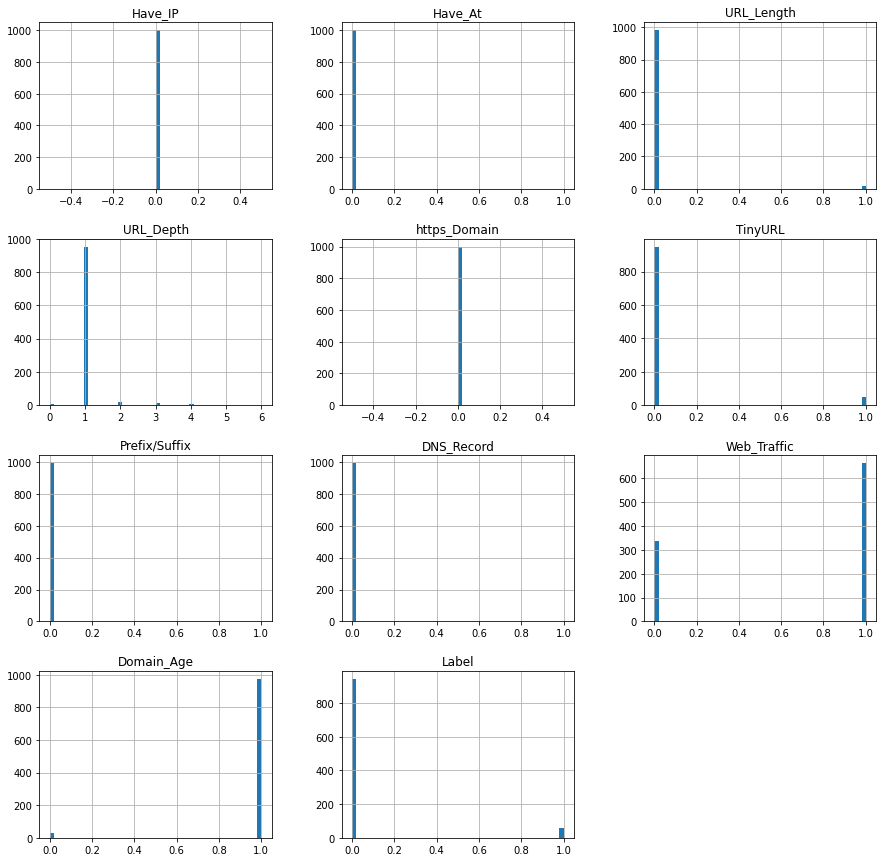

In [ ]:
#Plotting the data distribution
legitimate.hist(bins = 50,figsize = (15,15))
plt.show()

In [ ]:
#Dropping the Domain column
data = legitimate.drop(['Domain'], axis = 1).copy()

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Label            0
dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Label
0,0,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,0,0,1,1,0
2,0,0,0,1,0,0,0,0,1,1,0
3,0,0,0,1,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,1,1,0


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((1000, 10), (1000,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((800, 10), (200, 10))

# This section is for Performance results

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# Classifier: Decision Tree

In [ ]:
# Decision Tree model 
import time
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 10)
# fit the model 
tree.fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=10)
scores.mean()

print("--- %s seconds ----" %(time.time() - start_time ))

--- 0.04540610313415527 seconds ----


In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

Performance Evaluation

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = scores.mean()
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.994
Decision Tree: Accuracy on test Data: 0.995


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# Classifier: Random Forest

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
# instantiate the model
forest = RandomForestClassifier(max_depth=10)

# fit the model 
forest.fit(X_train, y_train)
scores = cross_val_score(forest, X_train, y_train, cv=10)
scores.mean()
print("--- %s seconds ----" %(time.time() - start_time ))

--- 1.8393723964691162 seconds ----


In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

Performance Evaluation

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = scores.mean()
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.994
Random forest: Accuracy on test Data: 0.995


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# XGBoost Classifier 

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier
start_time = time.time()

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=10)
#fit the model
xgb.fit(X_train, y_train)
scores = cross_val_score(xgb, X_train, y_train, cv=10)
scores.mean()
print("--- %s seconds ----" %(time.time() - start_time ))

--- 1.061084508895874 seconds ----


In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

Performance evaluation

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = scores.mean()
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.989
XGBoost : Accuracy on test Data: 0.995


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

# **Classifier: Artificial Neural Network**

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:

from sklearn.preprocessing import StandardScaler                   # for normalization of our data
from keras.wrappers.scikit_learn import KerasClassifier            #package allowing keras to work with python
from sklearn.model_selection import cross_val_score, GridSearchCV  #using Kfold and if needed, GridSearch object in analysis
from sklearn.utils import shuffle                                  # shuffling our own made dataset
from keras.models import Sequential                                # linear layer stacks model for keras
from keras.layers import Dense, Dropout     

In [ ]:
    epoch = 20
        
    classifier = Sequential()
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform', input_dim = 10))
    #classifier.add(Dropout(p= 0.1))
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform'))
    #classifier.add(Dropout(p= 0.1))
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform'))
    #classifier.add(Dropout(p= 0.1))
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform'))      
    #classifier.add(Dropout(p= 0.1))   
    classifier.add(Dense(units = 1, activation='sigmoid',kernel_initializer='uniform'))
    #classifier.add(Dropout(p= 0.1))
    classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    start_time = time.time()
    history = classifier.fit(X_train, y_train, epochs=epoch, validation_data=(X_test, y_test), verbose=1)
    print("--- %s seconds ----" %(time.time() - start_time ))
    

Epoch 1/20
25/25 [==============================] - 3s 13ms/step - loss: 0.6845 - accuracy: 0.9237 - val_loss: 0.6699 - val_accuracy: 0.9550
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.9375 - val_loss: 0.5185 - val_accuracy: 0.9550
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3571 - accuracy: 0.9375 - val_loss: 0.2105 - val_accuracy: 0.9550
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2398 - accuracy: 0.9375 - val_loss: 0.1880 - val_accuracy: 0.9550
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.9375 - val_loss: 0.1428 - val_accuracy: 0.9550
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1562 - accuracy: 0.9375 - val_loss: 0.1067 - val_accuracy: 0.9550
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1258 - accuracy: 0.9375 - val_loss: 0.0921 - val_accuracy: 0.9600
Epoch 8/20
25/25 [=

7/7 [==============================] - 0s 4ms/step - loss: 0.0361 - accuracy: 0.9950
Test Accuracy: 99.500


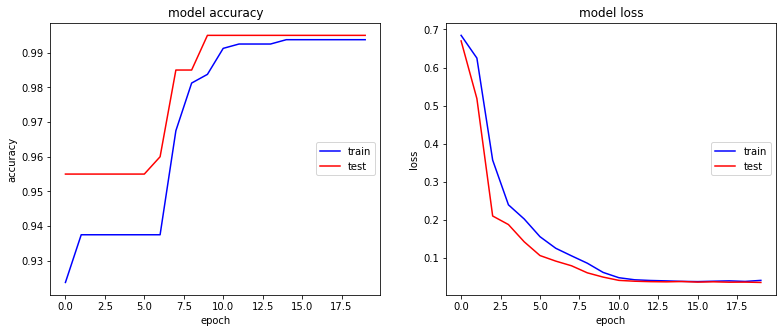

In [ ]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def visualisation_history(history):
  
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,5))

  ax1.plot(history.history['accuracy'],c='blue')
  ax1.plot(history.history['val_accuracy'],c='red')
  ax1.set_title('model accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'test'], loc='center right')
  

  ax2.plot(history.history['loss'],c='blue')
  ax2.plot(history.history['val_loss'],c='red')
  ax2.set_title('model loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'test'], loc='center right')
  plt.show()
# evaluation du modèle
_, acc =classifier.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % (acc * 100))
visualisation_history(history)

Performance Evaluation

In [ ]:
scores = cross_val_score(
                        estimator=classifier, 
                        X = X_train,
                        y = y_train,
                        cv=10)
#scores.mean()

TypeError: ignored

In [ ]:
y_test_ann  = classifier.predict(X_test)
y_train_ann = classifier.predict(X_train)

In [ ]:
acc_train_ann = classifier.evaluate(X_train,y_train)[1]
acc_test_ann = classifier.evaluate(X_test,y_test)[1]

print('\nANN: Accuracy on training Data: {:.3f}' .format(acc_train_ann))
print('ANN: Accuracy on test Data: {:.3f}' .format(acc_test_ann))

7/7 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9950

ANN: Accuracy on training Data: 0.994
ANN: Accuracy on test Data: 0.995


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('ANN', acc_train_ann, acc_test_ann)

# **Classifier: Convolutional Neural Network**


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


epoch = 20
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 32)             96        
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 32)             128       
_________________________________________________________________
dropout (Dropout)            (None, 9, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 64)             4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 64)             256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
epoch = 20
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

#model.summary()

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_test, y_test), verbose=1)
print("--- %s seconds ----" %(time.time() - start_time ))

# classifier = KerasClassifier(build_fn= CNN_builder,
#                              batch_size = 10,
#                              nb_epoch = 100)


Epoch 1/20
25/25 [==============================] - 0s 8ms/step - loss: 0.1305 - accuracy: 0.9675 - val_loss: 0.0647 - val_accuracy: 0.9800
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.1515 - accuracy: 0.9700 - val_loss: 0.0618 - val_accuracy: 0.9800
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.1355 - accuracy: 0.9625 - val_loss: 0.0591 - val_accuracy: 0.9800
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.1353 - accuracy: 0.9650 - val_loss: 0.0561 - val_accuracy: 0.9850
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.1005 - accuracy: 0.9775 - val_loss: 0.0544 - val_accuracy: 0.9850
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.1287 - accuracy: 0.9675 - val_loss: 0.0545 - val_accuracy: 0.9850
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.1103 - accuracy: 0.9700 - val_loss: 0.0553 - val_accuracy: 0.9850
Epoch 8/20
25/25 [==

Performance evaluation

In [ ]:
acc_train_cnn = scores.mean()
acc_test_cnn = model.evaluate(X_test, y_test)[1]

print('\nCNN: Accuracy on training Data: {:.3f}' .format(acc_train_cnn))
print('CNN: Accuracy on test Data: {:.3f}' .format(acc_test_cnn))

7/7 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9850

CNN: Accuracy on training Data: 0.989
CNN: Accuracy on test Data: 0.985


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_test_cnn)

# Performance Comparison

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.994,0.995
1,Random Forest,0.994,0.995
2,XGBoost,0.989,0.995
3,ANN,0.994,0.995
4,CNN,0.989,0.985


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.994,0.995
1,Random Forest,0.994,0.995
3,ANN,0.994,0.995
2,XGBoost,0.989,0.995
4,CNN,0.989,0.985


In [ ]:
# # Save model
# model.save("CNN-Antiphishing")